In [ ]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-cd0a7580851e>", line 3, in <module>
    get_ipython().magic('cd /gdrive')
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "<decorator-gen-91>", line 2, in cd
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compa

OSError: ignored

In [ ]:
train=pd.read_csv("/gdrive/My Drive/ATiML/Train_doc2vec.csv")
test=pd.read_csv("/gdrive/My Drive/ATiML/Test_doc2vec.csv")
mergedDF=pd.concat([train,test],axis=0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
del  mergedDF['Content']
del  mergedDF['id']
del  mergedDF['clean_data']
del  mergedDF['cnt']
del  mergedDF['index']

In [ ]:
 # creating instance of one-hot-encoder
 enc = OneHotEncoder(handle_unknown='ignore')
 # passing bridge-types-cat column (label encoded values of bridge_types)
 enc_df = pd.DataFrame(enc.fit_transform(mergedDF[['Author_Name']]).toarray())
 # merge with main df bridge_df on key values
 del mergedDF['Author_Name']
 col_name=[]
 for i in range(enc_df.columns.start,enc_df.columns.stop,enc_df.columns.step):
    x="AutName"+(str(i))
    col_name.append(x)
 enc_df.columns=col_name
 mergedDF= mergedDF.join(enc_df)

In [ ]:
 enc1 = OneHotEncoder(handle_unknown='ignore')
 enc_df1 = pd.DataFrame(enc1.fit_transform(mergedDF[['Book_Name']]).toarray())
 # merge with main df bridge_df on key values
 del mergedDF['Book_Name']
 col_name=[]
 for i in range(enc_df1.columns.start,enc_df1.columns.stop,enc_df1.columns.step):
    x="Book_Name"+(str(i))
    col_name.append(x)
 enc_df1.columns=col_name
 mergedDF= mergedDF.join(enc_df1)

In [ ]:
doc2vec_train, doc2vec_test = train_test_split(mergedDF, test_size=0.3, random_state=42, stratify = np.array(mergedDF['guten_genre']))

In [ ]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
y_train = labelencoder.fit_transform(doc2vec_train['guten_genre'])
y_test = labelencoder.fit_transform(doc2vec_test['guten_genre'])
del doc2vec_train['guten_genre']
del doc2vec_test['guten_genre']

print(doc2vec_train.shape)
print(doc2vec_test.shape)
print(y_train.shape)
print(y_test.shape)

(695, 1798)
(299, 1798)
(695,)
(299,)


In [ ]:
print(doc2vec_train.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       'Book_Name982', 'Book_Name983', 'Book_Name984', 'Book_Name985',
       'Book_Name986', 'Book_Name987', 'Book_Name988', 'Book_Name989',
       'Book_Name990', 'Book_Name991'],
      dtype='object', length=1798)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu',input_shape=(doc2vec_train.shape[1],)),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                17990     
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 99        
Total params: 18,089
Trainable params: 18,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 100
batch_size = 64

history = model.fit(doc2vec_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

#model.fit(train, train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
print(history)

Epoch 1/100
10/10 [==============================] - 0s 13ms/step - loss: 2.1852 - accuracy: 0.1920 - val_loss: 2.1646 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 2.1529 - accuracy: 0.6288 - val_loss: 2.1344 - val_accuracy: 0.8000
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 2.1208 - accuracy: 0.7824 - val_loss: 2.1037 - val_accuracy: 0.8429
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 2.0867 - accuracy: 0.7920 - val_loss: 2.0699 - val_accuracy: 0.8429
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 2.0480 - accuracy: 0.7920 - val_loss: 2.0330 - val_accuracy: 0.8429
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 2.0053 - accuracy: 0.7920 - val_loss: 1.9919 - val_accuracy: 0.8429
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 1.9571 - accuracy: 0.7920 - val_loss: 1.9473 - val_accuracy: 0.8429
Epoch 8/100


In [ ]:
predictions=model.predict_classes(doc2vec_test)
train_pred=model.predict_classes(doc2vec_train)

print("train accuracy: {} ".format(accuracy_score(y_train,train_pred,normalize=True, sample_weight=None)))
print("test accuracy: {} ".format(accuracy_score(y_test,predictions,normalize=True, sample_weight=None))) 
print('Testing F1 score: {}'.format(f1_score(y_test,predictions, average='weighted')))

train accuracy: 0.8690647482014389 
test accuracy: 0.7959866220735786 
Testing F1 score: 0.7329648446475528


In [ ]:
accr = model.evaluate(doc2vec_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

10/10 [==============================] - 0s 1ms/step - loss: 0.8144 - accuracy: 0.7960
Test set
  Loss: 0.814
  Accuracy: 0.796


In [ ]:
print("Confusion Matrix:     ")
print(confusion_matrix(y_test, predictions))
        
print("\n\nClassification Report:       ")
print(classification_report(y_test, predictions))

Confusion Matrix:     
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   5   0   0  27   0   1   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   4   0   0 233   0   1   0]
 [  0   0   1   0   0   4   0   0   0]
 [  0   0   1   0   0  10   0   0   0]
 [  0   0   0   0   0   5   0   0   0]]


Classification Report:       
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.45      0.15      0.23        33
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.81      0.98      0.89       238
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         5

    accuracy                           0.80       2

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


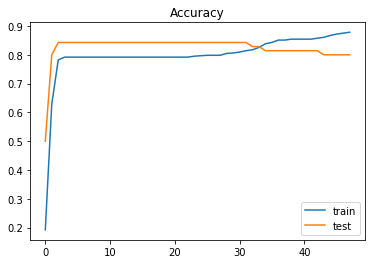

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

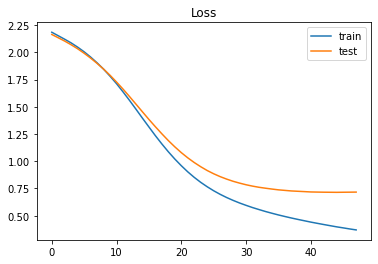

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();